## Table of Content
1. Cleaning the Data

In [1]:
#Import the needed libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as scipy
import pandas as pd

### 1. Cleaning the Data

#### A. Quick Overview

In [2]:
df = pd.read_csv("1.books_original.csv", on_bad_lines='error')

ParserError: Error tokenizing data. C error: Expected 12 fields in line 3350, saw 13


> There's an issue where certain lines had more columns than expected due to commas in author names. We went in manually to change them based on the error message pointer:
>- line 3350: Sam Bass Warner, Jr. > Sam Bass Warner Jr.
>- line 4704: David E. Smith (Turgon of TheOneRing.net, one of the... > David E. Smith (Turgon of TheOneRing.net one of the...
>- line 5879: James Wesley, Rawles > James Wesley Rawles
>- line 8981 - Brown, Son & Ferguson > "Brown, Son & Ferguson"

In [3]:
#For sake of tracability, any edit needed for the data source will create a new csv file
df = pd.read_csv("2.books_author_names_corrected.csv", on_bad_lines='error')

In [4]:
#let's check how many lines and columns are in the dataset
df.shape

(11127, 12)

In [5]:
df.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [6]:
df.tail(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11125,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco
11126,45641,Las aventuras de Tom Sawyer,Mark Twain,3.91,8497646983,9788497646987,spa,272,113,12,5/28/2006,Edimat Libros


In [7]:
df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

> No null values in the dataset!

In [8]:
df.nunique()

bookID                11127
title                 10352
authors                6643
average_rating          209
isbn                  11127
isbn13                11127
language_code            27
num_pages               997
ratings_count          5294
text_reviews_count     1822
publication_date       3679
publisher              2292
dtype: int64

><br><b>title:</b> 10 352 values are unique, out of 11 127 lines. Since there are no duplicates in the ISBN, this suggests that there are several editions of a same book in the dataset.
><br><b>authors:</b> 6643 values are unique, out of 11 127 lines. Highly likely that some authors appear several times in the dataset, either for different editions of a same book, or for different books.
>   It would be interesting to see if there is a consistency in ratings and reviews for a given author i.e. their popularity
><br><b>language_code</b> 27 values are unique, indicating that there isn't such a wide variety of languages for the books in the dataset.
><br><b>publication_date:</b> 3679 values are unique, out of 11 127 lines. This is particularly interesting as it's a full date and not just a year. It's highly probable that publishers have set publishing dates for books.
><br><b>publisher:</b> 2292 values are unique, out of 11 127 lines. It would seem that some publishing houses appear several times in the dataset.
>   It would be interesting to see if there is a consistency in ratings and reviews for a book from a given publisher i.e. their books' popularity

In [9]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11127.000000,11127.000000,1.112700e+04,11127.000000,1.112700e+04,11127.000000
mean,21310.938887,3.933631,9.759888e+12,336.376921,1.793641e+04,541.854498
std,13093.358023,0.352445,4.428964e+11,241.127305,1.124794e+05,2576.176608
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10287.000000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780586e+12,299.000000,7.450000e+02,46.000000
75%,32104.500000,4.135000,9.780873e+12,416.000000,4.993500e+03,237.500000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


><b>bookID:</b> Nothing of note here, it serves as a unique identifier for the books. Although we can point out that the data seems to have some ID skips.
><br><b>average_rating:</b> We have an average rating of 3.93. By itself, this doesn't tell us much on the data spread. However, if we look, we can see that only 25% of the dataset has an average rating below 3.77. This means the dataset is skewed with books of higher ratings.
><br><b>isbn13:</b> Nothing of note here, it serves as a unique identifier for the books.
><br><b>num_pages:</b> Interestingly, there are some books that have 0 pages, suggesting either an error in the data, or possibly audiobooks being included in the dataset.
><br><b>ratings_count:</b> The high standard deviation, as well as the min and max values, seem to indicate a wide range of values. Some books have 0 ratings.
><br><b>text_reviews_count:</b> The high standard deviation, as well as the min and max values, seem to indicate a wide range of values. Some books have 0 reviews.

C:\Users\mattie\.conda\envs\pls2\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


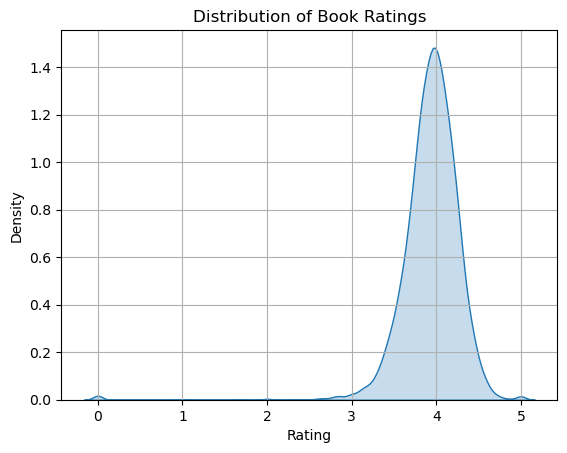

In [10]:
#Let's graph the different average ratings
sns.kdeplot(df['average_rating'], fill=True)

plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Density')

plt.grid(True)
plt.show()

> We have a normal distribution. The issue here is that in terms of machine learning, the model will have a lot of information for books that have a rating of around 4, and not so much for books that have a rating under 3.
> <br>As such, we decided to add more information to the dataset.

#### B. Adding Additional Data

| Data Source              | Y/N | Reasoning |
| :---------------- | :------: | :----: |
| Goodreads       |   N   | API was discontinued in 2020. A user cannot search manually by ratings, rendering webscraping attemps null |
| Open Library          |   N   | Great API. However, same as Goodreads, a user cannot search by ratings. |
| Google Books    |  N   | API requires a token. Web scraping did not allow us to search by ratings. |
| Open Library Public Data Dump |  N  | This was our go-to until we found a better option. |
| <b>Goodreads 2017 Data Dump</b> |  <b>Y</b>  | <b>We chose this as it allowed us to be as close to the original dataset as possible. The same column names were in use.</b> |

>This dataset we selected was kindly provided by Mengting Wan on their [GitHub](https://mengtingwan.github.io/data/goodreads.html).
>
>Here are the following citations for the dataset:
> * Mengting Wan, Julian McAuley, "[Item Recommendation on Monotonic Behavior Chains](https://mengtingwan.github.io/paper/recsys18_mwan.pdf)", in RecSys'18. [[bibtex](https://dblp.uni-trier.de/rec/conf/recsys/WanM18.html?view=bibtex)]
> * Mengting Wan, Rishabh Misra, Ndapa Nakashole, Julian McAuley, "[Fine-Grained Spoiler Detection from Large-Scale Review Corpora](https://mengtingwan.github.io/paper/acl19_mwan.pdf)", in ACL'19. [[bibtex](https://dblp.uni-trier.de/rec/conf/acl/WanMNM19.html?view=bibtex)]
>
>
> The process for importing the dataset was as follows:
> * We downloaded 2 datasets in JSON; the detailed book graph and the detailed information of authors. The author dataset was needed to retrieve the author names for a given author id. For reference, the detailed book graph has around 2.3M books in its dataset.
> * The huge file sizes meant we had to find a different way to tailor the dataset down to what we needed. Our different attempts involved: Python, MSSQL, and Tableau. We settled on Tableau as it was easy to use and filter. The final dataset was in CSV format.
> * We tailored it down to books with an average rating of 3.5 and under.
> * To note: the ISBN13 was missing when exporting to CSV. We considered this acceptable as it would have no impact on our model training later on

In [11]:
datadump_df = pd.read_csv("goodreads_datadump_rating_under_3nhalf.csv", on_bad_lines='error')

In [12]:
#Checking how many lines and columns are in the dataset
datadump_df.shape

(66607, 12)

In [13]:
#Checking for null values
datadump_df.isna().sum()

bookID                    0
isbn                      0
language_code             0
authors               38964
publication_date          0
publisher                 0
title                     0
average_rating            0
isbn13                66577
num_pages                 0
ratings_count             0
text_reviews_count        0
dtype: int64

> The ISBN13 would not export to CSV despite our many tries. We considered it acceptable to keep the dataset as it has no impact on our model learning later on.

In [14]:
#Drop lines that have no author
datadump_df.dropna(subset=['authors'], inplace=True)

In [15]:
#Let's test for duplicate values between the two datasets and take that into account for the merge of the two later on
combined_df = df.merge(datadump_df, on='isbn', how='inner', indicator=True)

if not combined_df.empty:
    print("There are duplicate values in the 'isbn' column between the two DataFrames:")
    print(combined_df)
else:
    print("There are no duplicate values in the 'isbn' column between the two DataFrames.")

There are duplicate values in the 'isbn' column between the two DataFrames:
     bookID_x                                            title_x  \
0          22                        Bill Bryson's African Diary   
1         159                          Dinner with Anna Karenina   
2         403                                          Americana   
3         407                                 Great Jones Street   
4         416                        Slow Learner: Early Stories   
..        ...                                                ...   
316     44737  The Elements of Visual Style: The Basics of Pr...   
317     44841                                Einstein's Monsters   
318     44883  Brando Unzipped: A Revisionist and Very Privat...   
319     44930  The Glass Books of the Dream Eaters (Miss Temp...   
320     44976           Such a Good Girl and Other Crime Stories   

                       authors_x  average_rating_x        isbn       isbn13_x  \
0                    Bill 

In [16]:
datadump_df.head(1)

,bookID,isbn,language_code,authors,publication_date,publisher,title,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
0,22,0767915062,eng,Bill Bryson,2002,Broadway Books,Bill Bryson's African Diary,3.41,NaN,55,6410,416


In [17]:
#In the original dataset, the publication_date is a full date. Here, we have it in year format.
#Let's align our original dataset to this one
df['publication_date'] = pd.to_datetime(df['publication_date'],format=('%m/%d/%Y'))

ValueError: day is out of range for month, at position 8180. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [18]:
#There are some dates that are not correctly formatted. We went through the lines manually for each error pointer we received:

#November 31st is indeed not a viable date. Looking up its ISBN on Goodreads tells us this is a typo: it should be 10/31/2000.
df.at[8180, 'publication_date'] = '10/31/2000'

#June 31st is indeed not a viable date. Looking up its ISBN on Goodreads tells us this is a typo: it should be 6/30/1982.
df.at[11098, 'publication_date'] = '6/30/1982'

In [19]:
#Let's confirm there are no additional incorrectly formatted dates
df['publication_date'] = pd.to_datetime(df['publication_date'],format=('%m/%d/%Y'))

In [20]:
#Now let's retrieve just the year. We are specifying int64 as it's the same data type as the one in the datadump set.
df['publication_date'] = df['publication_date'].dt.year.astype('int64')

In [21]:
#Verifying it's of the correct integer type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11127 non-null  int64  
 1   title               11127 non-null  object 
 2   authors             11127 non-null  object 
 3   average_rating      11127 non-null  float64
 4   isbn                11127 non-null  object 
 5   isbn13              11127 non-null  int64  
 6   language_code       11127 non-null  object 
 7   num_pages           11127 non-null  int64  
 8   ratings_count       11127 non-null  int64  
 9   text_reviews_count  11127 non-null  int64  
 10  publication_date    11127 non-null  int64  
 11  publisher           11127 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 1.0+ MB


In [22]:
datadump_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27643 entries, 0 to 66605
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              27643 non-null  int64  
 1   isbn                27643 non-null  object 
 2   language_code       27643 non-null  object 
 3   authors             27643 non-null  object 
 4   publication_date    27643 non-null  int64  
 5   publisher           27643 non-null  object 
 6   title               27643 non-null  object 
 7   average_rating      27643 non-null  float64
 8   isbn13              7 non-null      float64
 9   num_pages           27643 non-null  int64  
 10  ratings_count       27643 non-null  int64  
 11  text_reviews_count  27643 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 2.7+ MB


#### C. Merged Dataset

In [23]:
#Let's merge the two datasets
merged_df = pd.concat([df, datadump_df]).drop_duplicates(subset='isbn').reset_index(drop=True)

merged_df.nunique()

bookID                38449
title                 33575
authors               14397
average_rating          288
isbn                  38449
isbn13                11134
language_code            63
num_pages              1053
ratings_count          6014
text_reviews_count     1963
publication_date         95
publisher              7464
dtype: int64

> Alright, no further duplicate values in the isbn column.

In [24]:
merged_df.isnull().sum()

bookID                    0
title                     0
authors                   0
average_rating            0
isbn                      0
isbn13                27315
language_code             0
num_pages                 0
ratings_count             0
text_reviews_count        0
publication_date          0
publisher                 0
dtype: int64

> * The isbn13 column will be dropped later on. So the null values here are of no consequence.

In [25]:
merged_df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count,publication_date
count,3.844900e+04,38449.000000,1.113400e+04,38449.000000,3.844900e+04,38449.000000,38449.000000
mean,8.580046e+06,3.465828,9.753752e+12,267.582512,5.405387e+03,185.279071,2004.652917
std,9.654566e+06,0.409711,5.058460e+11,181.860949,6.104612e+04,1413.633903,9.989421
min,1.000000e+00,0.000000,3.970000e+02,0.000000,0.000000e+00,0.000000,1900.000000
25%,3.801200e+04,3.270000,9.780345e+12,157.000000,1.800000e+01,3.000000,2001.000000
50%,4.989671e+06,3.420000,9.780582e+12,245.000000,7.000000e+01,9.000000,2006.000000
75%,1.599192e+07,3.640000,9.780872e+12,348.000000,3.820000e+02,40.000000,2012.000000
max,3.645850e+07,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000,2020.000000


In [26]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count,publication_date
count,11127.000000,11127.000000,1.112700e+04,11127.000000,1.112700e+04,11127.000000,11127.000000
mean,21310.938887,3.933631,9.759888e+12,336.376921,1.793641e+04,541.854498,2000.167520
std,13093.358023,0.352445,4.428964e+11,241.127305,1.124794e+05,2576.176608,8.248836
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000,1900.000000
25%,10287.000000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000,1998.000000
50%,20287.000000,3.960000,9.780586e+12,299.000000,7.450000e+02,46.000000,2003.000000
75%,32104.500000,4.135000,9.780873e+12,416.000000,4.993500e+03,237.500000,2005.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000,2020.000000


> The average rating spread is now lower than in the original dataset, and the data points are slightly more spread out.

C:\Users\mattie\.conda\envs\pls2\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


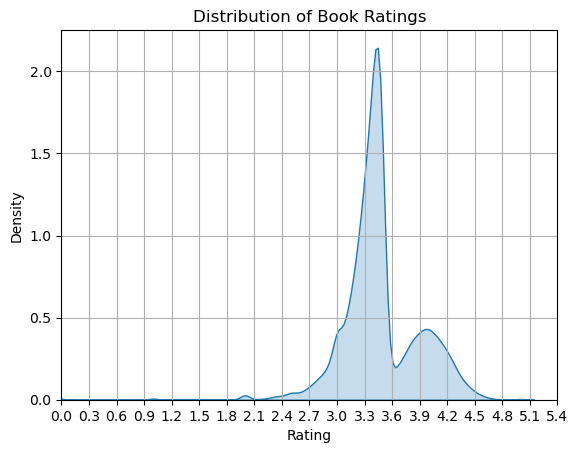

In [27]:
sns.kdeplot(merged_df['average_rating'], fill=True)

plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Density')

#Limits & Ticks
plt.xlim(0, 5)
plt.xticks(np.arange(0, 5.5, 0.3))

plt.grid(True)
plt.show()

> We now have a dataset that is much more skewed towards a rating of around 3.5

##### Language

In [28]:
merged_df.groupby(['language_code']).count()

,bookID,title,authors,average_rating,isbn,isbn13,num_pages,ratings_count,text_reviews_count,publication_date,publisher
language_code,,,,,,,,,,,
afr,1,1,1,1,1,0,1,1,1,1,1
ale,1,1,1,1,1,1,1,1,1,1,1
ang,1,1,1,1,1,0,1,1,1,1,1
ara,67,67,67,67,67,3,67,67,67,67,67
ben,18,18,18,18,18,0,18,18,18,18,18
...,...,...,...,...,...,...,...,...,...,...,...
ukr,1,1,1,1,1,0,1,1,1,1,1
urd,3,3,3,3,3,0,3,3,3,3,3
vie,3,3,3,3,3,0,3,3,3,3,3


In [29]:
#Let's see how many books are in English
merged_df['language_code'].str.startswith('en').sum()/merged_df['language_code'].count().sum()

0.7665999115711722

In [30]:
#Unifying all the subsets of English into just English
merged_df['language_code'] = merged_df['language_code'].replace(['en-CA', 'en-GB', 'en-US', 'enm'], 'eng')
merged_df.groupby(['language_code']).count()

,bookID,title,authors,average_rating,isbn,isbn13,num_pages,ratings_count,text_reviews_count,publication_date,publisher
language_code,,,,,,,,,,,
afr,1,1,1,1,1,0,1,1,1,1,1
ale,1,1,1,1,1,1,1,1,1,1,1
ang,1,1,1,1,1,0,1,1,1,1,1
ara,67,67,67,67,67,3,67,67,67,67,67
ben,18,18,18,18,18,0,18,18,18,18,18
bul,40,40,40,40,40,0,40,40,40,40,40
cat,12,12,12,12,12,0,12,12,12,12,12
cze,36,36,36,36,36,0,36,36,36,36,36
dan,67,67,67,67,67,0,67,67,67,67,67


##### Authors

In [31]:
#We want to retrieve the main author i.e. the first in appearance order
merged_df['first author'] = merged_df['authors'].str.split('/').str[0]

In [32]:
#Let's move this new column next to the authors one
merged_df.insert(3, 'first author', merged_df.pop('first author'))
merged_df.head(1)

,bookID,title,authors,first author,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,J.K. Rowling,4.57,0439785960,9.780440e+12,eng,652,2095690,27591,2006,Scholastic Inc.


##### D. Number of Pages

> There is a portion of books that have 0 pages. It is likely that there are audiobooks or other similar formats within our dataset.
>
> To remedy this, we webscraped Open Library to retrieve not only the format of the book, but also if the book is part of a series.

><b>Code</b>:
>
><code>import pandas as pd
><br>import requests
><br>from concurrent.futures import ThreadPoolExecutor
>
><br>df = pd.read_csv("../filename.csv")
>
><br>def get_book_info(isbn):
><br>    url = f"https://openlibrary.org/isbn/{isbn}.json"
><br>    response = requests.get(url)
><br>    if response.status_code == 200:
><br>        data = response.json()
><br>        physical_format = data.get("physical_format", "")
><br>        series = 1 if data.get("series") else 0
><br>        return physical_format, series
><br>    else:
><br>        return "", ""
>
>def process_isbn(isbn, idx):
><br>    physical_format, series = get_book_info(isbn)
><br>    return idx, physical_format, series
>
><br>futures = []
><br>for idx, isbn in enumerate(df["isbn"]):
><br>    futures.append((idx, isbn))
>
><br>new_data = []
><br>with ThreadPoolExecutor() as executor:
><br>    for idx, isbn in futures:
><br>        future = executor.submit(process_isbn, isbn, idx)
><br>        new_data.append(future)
>
><br>for future in new_data:
><br>    idx, physical_format, series = future.result()
><br>    df.at[idx, "Physical Format"] = physical_format
><br>    df.at[idx, "Series Exists"] = series
>
><br>df.to_csv("filenameseries.csv", index=False)</code>

In [33]:
final_merged_df = pd.read_csv("3.books_merged_series_format.csv", on_bad_lines='error')

In [34]:
final_merged_df.head(5)

,bookID,title,authors,first author,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,format,series exists
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,J.K. Rowling,4.57,0439785960,9.780440e+12,eng,652,2095690,27591,2006,Scholastic Inc.,Paperback,1.0
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,J.K. Rowling,4.49,0439358078,9.780439e+12,eng,870,2153167,29221,2004,Scholastic Inc.,Paperback,0.0
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,J.K. Rowling,4.42,0439554896,9.780440e+12,eng,352,6333,244,2003,Scholastic,hardcover,0.0
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,J.K. Rowling,4.56,043965548X,9.780440e+12,eng,435,2339585,36325,2004,Scholastic Inc.,paperback,0.0
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,J.K. Rowling,4.78,0439682584,9.780440e+12,eng,2690,41428,164,2004,Scholastic,NaN,0.0


> It seems that some books went unmarked as series when they should not have been. We will still keep this column for the moment for the graph exploration

In [35]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

value_counts = final_merged_df['format'].value_counts()

print(value_counts)

pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

format
Paperback                                   6144
Hardcover                                   1661
paperback                                   1362
Mass Market Paperback                       1287
hardcover                                    444
Audio CD                                     184
mass market paperback                        126
audio cd                                     111
eBook                                         76
Comic                                         68
Board book                                    43
Unknown Binding                               36
Electronic resource                           34
perfect paperback                             31
Library Binding                               20
Audio Cassette                                18
Audio cassette                                15
School & Library Binding                      15
Taschenbuch                                   13
Library binding                               12
pocket book  

In [36]:
#Let's unify it into 3 categories: physical, digital and audio

#Account for spelling discrepancies
final_merged_df['format'] = final_merged_df['format'].str.lower()

# Mapping of our categories to numerical values
category_mapping = {
    # Physical Formats
    'paperback': 1, 'hardcover': 1, 'mass market paperback': 1, 'comic': 1, 'board book': 1,
    'unknown binding': 1, 'library binding': 1, 'school & library binding': 1, 'taschenbuch': 1,
    'trade paperback': 1, 'spiral-bound': 1, 'turtleback': 1, 'perfect paperback': 1,
    'textbook binding': 1, 'flexibound': 1, 'brossura': 1, 'leather bound': 1,
    'tankobon hardcover': 1, 'hardcover (with dust jacket)': 1, 'paperback bunko': 1,
    'leather bound': 1, 'hardcover comic': 1, 'print book': 1, 'cartwheel; paperback': 1,
    'wall chart': 1, 'hardcover with dust jacket': 1, 'hardcover (gibraltar library binding)': 1,
    'imitation leather': 1, 'box set': 1, 'vinyl bound': 1, 'graphic novel': 1, 'pamphlet': 1,
    'three hardcover with slipcase, hardcover': 1, 'cardbook': 1, 'softcover': 1,
    'trade paperback': 1, 'paperback; hardcover': 1,
    'tradepaperback': 1, 'pocket book': 1, 'hardback': 1, 'hardcover (with dustjacket)': 1, 'texte imprimé': 1,
    '[texte imprimé] :': 1, '[texte imprimé] /': 1, '[texto impreso] /': 1,
    '2': 1, 'large print': 1,
    'tapa dura': 1, 'single issue magazine': 1, 'tapa dura con sobrecubierta': 1,
    'calendar': 1, 'paperbook': 1, 'rústica': 1, 'tapa blanda': 1, 'poche': 1,
    'pasta blanda': 1, '[spanish]': 1, 'misc. supplies': 1,
    
    # Digital Formats
    'ebook': 2, 'electronic resource': 2, 'e-book': 2, '[electronic resource]': 2, 'epub': 2,
    '[electronic resource] /': 2, '[electronic resource] :': 2, 'e-book': 2, '[texto impreso]': 2,
    'preloaded digital audio player': 2, 'digital': 2, 'paperbac, ebook': 2, 'ebook': 2,
    
    # Audio Formats
    'audio cd': 3, 'audio cassette': 3, 'mp3 cd': 3, 'audio book': 3, 'digital audio': 3,
    '[sound recording] :': 3, '[sound recording]': 3, 'mini-disc': 3, 'cd audiobook': 3, 'mp3 cd': 3,
    '[sound recording] /': 3, 'cd-rom': 3, 'mp3 cd': 3, 'cd audiobook': 3
}

final_merged_df['format'] = final_merged_df['format'].replace(category_mapping)

In [37]:
final_merged_df['format'].value_counts()

format
1.0    11407
3.0      360
2.0      147
Name: count, dtype: int64

#### E. Series

In [38]:
#Let's check the null values
final_merged_df.isnull().sum()

bookID                    0
title                     0
authors                   0
first author              0
average_rating            0
isbn                      0
isbn13                27315
language_code             0
num_pages                 0
ratings_count             0
text_reviews_count        0
publication_date          0
publisher                 0
format                26535
series exists          7087
dtype: int64

> For now, we will keep the column for graph exploration and see what to do with it later on at the modelling stage.

#### F. Ratios

> Set up of ratios easier visualize them for the correlation matrix

In [39]:
#Title occurences
final_merged_df['title_occ'] = final_merged_df.groupby('title')['title'].transform('count')

In [40]:
#Author occurences
final_merged_df['author_occ'] = final_merged_df.groupby('first author')['first author'].transform('count')

In [41]:
#Publisher occurence
final_merged_df['publisher_occ'] = final_merged_df.groupby('publisher')['publisher'].transform('count')

In [42]:
#Ratings & Reviews Ratio
final_merged_df['ratings_reviews_ratio'] = final_merged_df['ratings_count'] / final_merged_df['text_reviews_count']

In [43]:
final_merged_df.isnull().sum()

bookID                       0
title                        0
authors                      0
first author                 0
average_rating               0
isbn                         0
isbn13                   27315
language_code                0
num_pages                    0
ratings_count                0
text_reviews_count           0
publication_date             0
publisher                    0
format                   26535
series exists             7087
title_occ                    0
author_occ                   0
publisher_occ                0
ratings_reviews_ratio       79
dtype: int64

In [44]:
#Let's check where those values are coming from
final_merged_df[final_merged_df['ratings_reviews_ratio'].isnull()][['ratings_count', 'text_reviews_count']]

,ratings_count,text_reviews_count
264,0,0
265,0,0
375,0,0
525,0,0
526,0,0
...,...,...
10517,0,0
10853,0,0
10866,0,0
10921,0,0


> It would seem that there are some null values being produced when dividing ratings and reviews that both have values of 0.

In [45]:
#Let's fill those values in with zero
final_merged_df['ratings_reviews_ratio'].fillna(0, inplace=True)

In [46]:
#Let's also account for infinite values
final_merged_df[final_merged_df['ratings_reviews_ratio'] == float('inf')][['ratings_count', 'text_reviews_count']]

,ratings_count,text_reviews_count
31,6,0
77,10,0
80,24,0
82,9,0
102,10,0
...,...,...
12280,16,0
13820,24,0
13821,23,0
16076,13,0


In [47]:
final_merged_df['ratings_reviews_ratio'].replace([np.inf, -np.inf], 0, inplace=True)

### 2. Exploring & Graphing Data

In [48]:
test_df = final_merged_df.copy()

In [49]:
test_df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count,publication_date,format,series exists,title_occ,author_occ,publisher_occ,ratings_reviews_ratio
count,3.844900e+04,38449.000000,1.113400e+04,38449.000000,3.844900e+04,38449.000000,38449.000000,11914.000000,31362.000000,38449.000000,38449.000000,38449.000000,38449.000000
mean,8.580046e+06,3.465828,9.753752e+12,267.582512,5.405387e+03,185.279071,2004.652917,1.072772,0.150437,1.568129,15.148144,99.295508,12.074786
std,9.654566e+06,0.409711,5.058460e+11,181.860949,6.104612e+04,1413.633903,9.989421,0.357659,0.357505,2.114294,23.565985,164.531657,19.207952
min,1.000000e+00,0.000000,3.970000e+02,0.000000,0.000000e+00,0.000000,1900.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,3.801200e+04,3.270000,9.780345e+12,157.000000,1.800000e+01,3.000000,2001.000000,1.000000,0.000000,1.000000,2.000000,5.000000,4.028571
50%,4.989671e+06,3.420000,9.780582e+12,245.000000,7.000000e+01,9.000000,2006.000000,1.000000,0.000000,1.000000,7.000000,27.000000,7.016129
75%,1.599192e+07,3.640000,9.780872e+12,348.000000,3.820000e+02,40.000000,2012.000000,1.000000,0.000000,1.000000,18.000000,110.000000,13.061350
max,3.645850e+07,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000,2020.000000,3.000000,1.000000,37.000000,194.000000,687.000000,1513.076923


#### A. Average Rating

In [50]:
#Average ratings spread
ratings_distribution = (test_df['average_rating'].round().value_counts() / len(test_df) * 100).sort_index()
print(ratings_distribution)

average_rating
0.0     0.067622
1.0     0.093631
2.0     1.217197
3.0    67.931546
4.0    30.198445
5.0     0.491560
Name: count, dtype: float64


C:\Users\mattie\.conda\envs\pls2\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


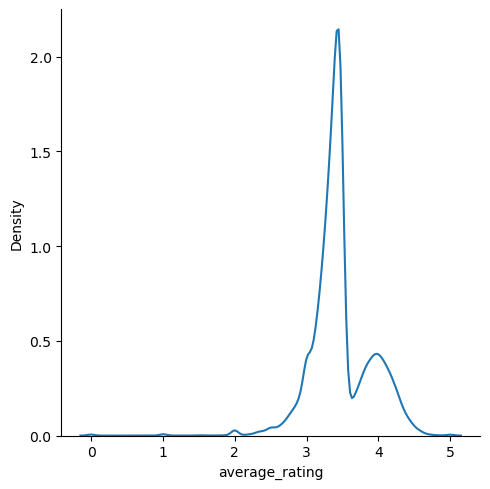

In [51]:
#The distribution
sns.displot(data = test_df, x = 'average_rating', kind = 'kde')

> We have more data for books rated 3. However, data for much lower-rated books remains small, implying that our model may be biased by more average to well-rated books.

#### B. Number of Pages

<Axes: >

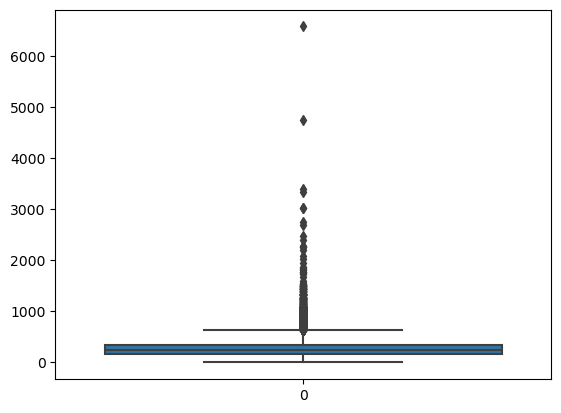

In [52]:
sns.boxplot(test_df.num_pages)

In [53]:
no_outliers1 = (test_df.num_pages<600)
sns.boxplot(test_df.num_pages[no_outliers1])

KeyError: 0

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=test_df['average_rating'].round(), y='num_pages', data=test_df)

plt.xlabel('Average Rating (Rounded)')
plt.ylabel('Number of Pages')
plt.title('Boxplot of Number of Pages vs. Average Rating (Rounded)')

plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=test_df.average_rating[no_outliers1].round(), y=test_df.num_pages[no_outliers1], data=test_df)

plt.xlabel('Average Rating (Rounded)')
plt.ylabel('Number of Pages')
plt.title('Boxplot of Number of Pages vs. Average Rating (Rounded)')

plt.show()

> There seems to be a small correlation between the number of pages and the average rating i.e. the higher the number of pages the higher the rating. Outliers will be dealt with at the start of the modelling phase.

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=test_df['format'].round(), y='num_pages', data=test_df)

plt.xlabel('Format')
plt.ylabel('Number of Pages')
plt.title('Boxplot of Number of Pages vs. Format')

> There are some outliers to account for in every category.

##### C. Ratings & Reviews

In [ ]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='ratings_count', y='text_reviews_count', data=test_df)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Rating Count')
plt.ylabel('Review Count')
plt.title('Relationship Between Rating Count and Review Count')

plt.show()

In [ ]:
no_outliers2 = (test_df.ratings_count<1000000) & (test_df.text_reviews_count <20000)

plt.figure(figsize=(10, 6))

sns.scatterplot(x=test_df.ratings_count[no_outliers2], y=test_df.text_reviews_count[no_outliers2], data=test_df)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Rating Count')
plt.ylabel('Review Count')
plt.title('Rating Count vs. Review Count')

plt.show()

> There does seem to be a good correlation between the rating count and the review count.

#### D. Publication Date

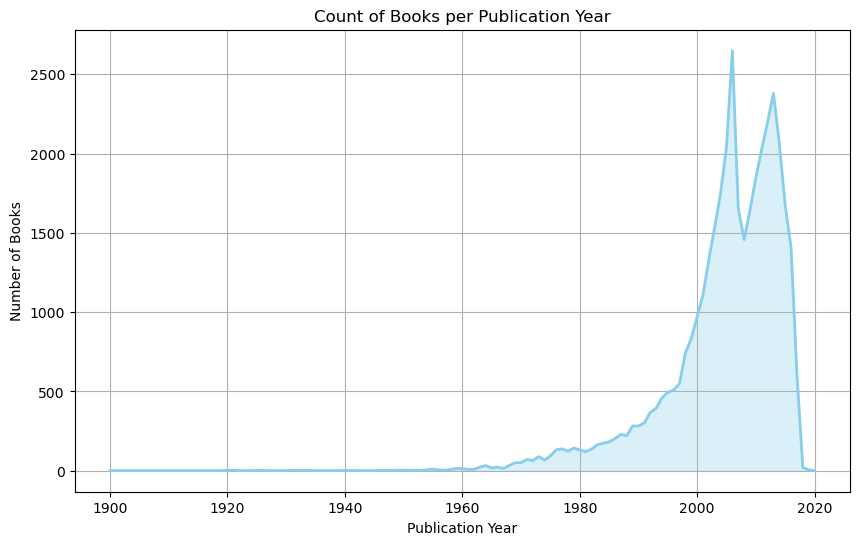

In [54]:
books_per_year = test_df['publication_date'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(books_per_year.index, books_per_year.values, color='skyblue', linewidth=2)
plt.fill_between(books_per_year.index, books_per_year.values, color='skyblue', alpha=0.3)
plt.title('Count of Books per Publication Year')
plt.xlabel('Publication Year')
plt.ylabel('Number of Books')
plt.grid(True)
plt.show()

> The majority of books seem to have been published in the 2000s-2010s

In [ ]:
#This graph takes a while to generate approx. 40s
plt.figure(figsize=(10, 6))
y = test_df.groupby('publication_date')['average_rating'].transform('mean') 
plt.bar(test_df['publication_date'], y)

plt.xlabel('Publication Year')
plt.ylabel('Average Rating')
plt.title('Average Rating of Books per Year')

plt.grid(True)
plt.show()

> There doesn't seem to be a correlation between the publication year and the average rating. Important to keep in mind that most of our data is skewed towards the 2000s.

#### E. Languages

In [ ]:
#Let's see the books per language category: english and other languages
english_rows = test_df['language_code'] == 'eng'

english_count = english_rows.sum()
other_count = (~english_rows).sum()

labels = ['English', 'Other Languages']
counts = [english_count, other_count]

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Language Distribution (English vs Other Languages)')
plt.axis('equal')
plt.show()

> In the original dataset, we had a score of 5.2% for other languages. Now, we have much more data points.

In [ ]:
plt.figure(figsize=(10, 6))

english_books = test_df[test_df['language_code'] == 'eng']
non_english_books = test_df[test_df['language_code'] != 'eng']

# Create separate histograms for English and Non-English books
sns.histplot(english_books['average_rating'], bins=10, color='blue', label='English', alpha=0.5)
sns.histplot(non_english_books['average_rating'], bins=10, color='red', label='Non-English', alpha=0.5)

plt.xlabel('Average Rating')
plt.ylabel('Count of Books')
plt.title('Histogram of Average Ratings by Language')
plt.legend()

plt.grid(True)
plt.show()


> The distribution is similar for both English and non-English books. There doesn't seem to be a correlation between the language and the average rating.

#### F. Format

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=test_df['format'].round(), y='average_rating', data=test_df)

plt.xlabel('Format')
plt.ylabel('Average Rating')
plt.title('Boxplot of Average Rating vs. Format')

In [ ]:
test_df['format'].value_counts()

> While it would seem that physical formats and audio formats tend to have higher ratings, it's important to remember that we do not have the equivalent amount of data points compared to the physical format values.

#### G. Series

In [ ]:
average_rating_by_series = test_df.groupby('series exists')['average_rating'].mean()

plt.bar(average_rating_by_series.index, average_rating_by_series.values)
plt.xlabel('Series Exists')
plt.ylabel('Average Rating')
plt.title('Average Rating by Series Existence')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

In [ ]:
sns.scatterplot(data=test_df, y="ratings_count", x='average_rating', hue="series exists", alpha=0.5)

plt.xlabel('Average Rating')
plt.ylabel('Ratings Count')
plt.title('Scatterplot of Ratings Count vs Average Rating by Series Existence')
plt.legend(title='Series Exists')
plt.show()

> There doesn't seem to be any particular correlation between the average rating and if it's a series or not. Take note that the ratings count axis is in scientific notation.

#### H. Authors & Publishers

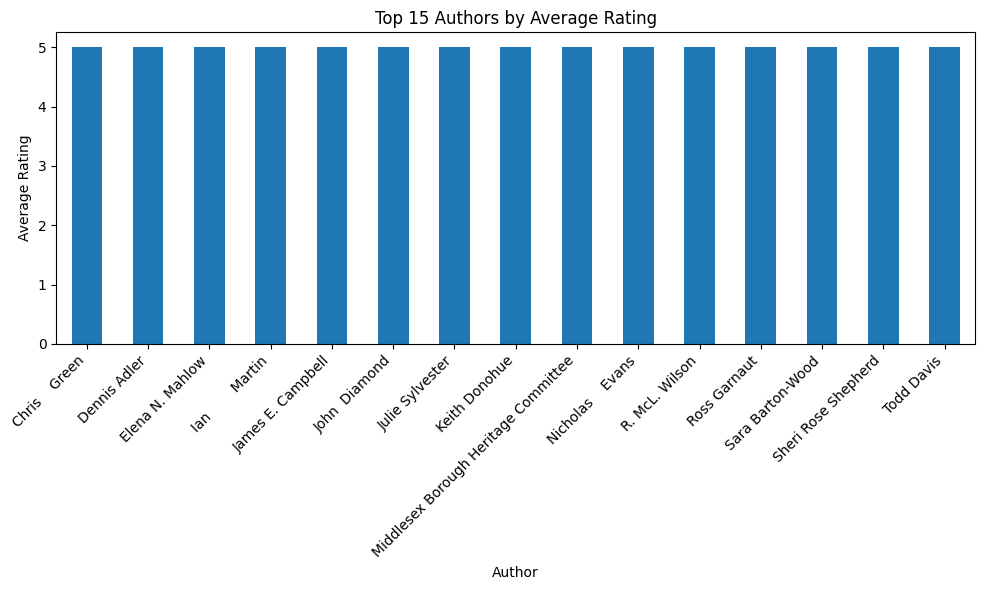

In [215]:
author_avg_rating = test_df.groupby('first author')['average_rating'].mean()

top_20_authors_avg_rating = author_avg_rating.nlargest(15)

plt.figure(figsize=(10, 6))
top_20_authors_avg_rating.plot(kind='bar')
plt.xlabel('Author')
plt.ylabel('Average Rating')
plt.title('Top 15 Authors by Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

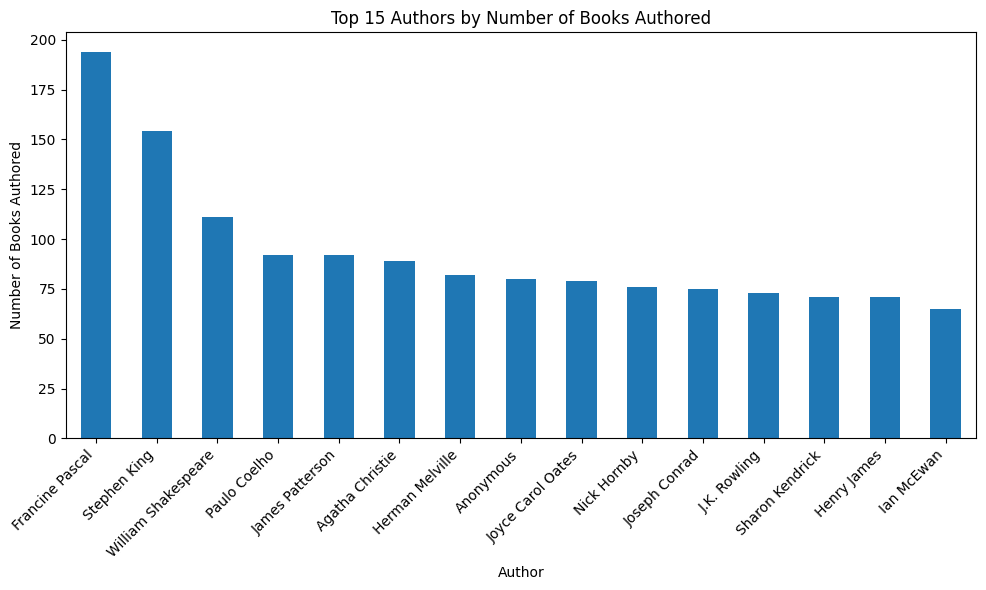

In [216]:
author_counts = test_df['first author'].value_counts()

top_20_authors = author_counts.head(15)

plt.figure(figsize=(10, 6))
top_20_authors.plot(kind='bar')
plt.xlabel('Author')
plt.ylabel('Number of Books Authored')
plt.title('Top 15 Authors by Number of Books Authored')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

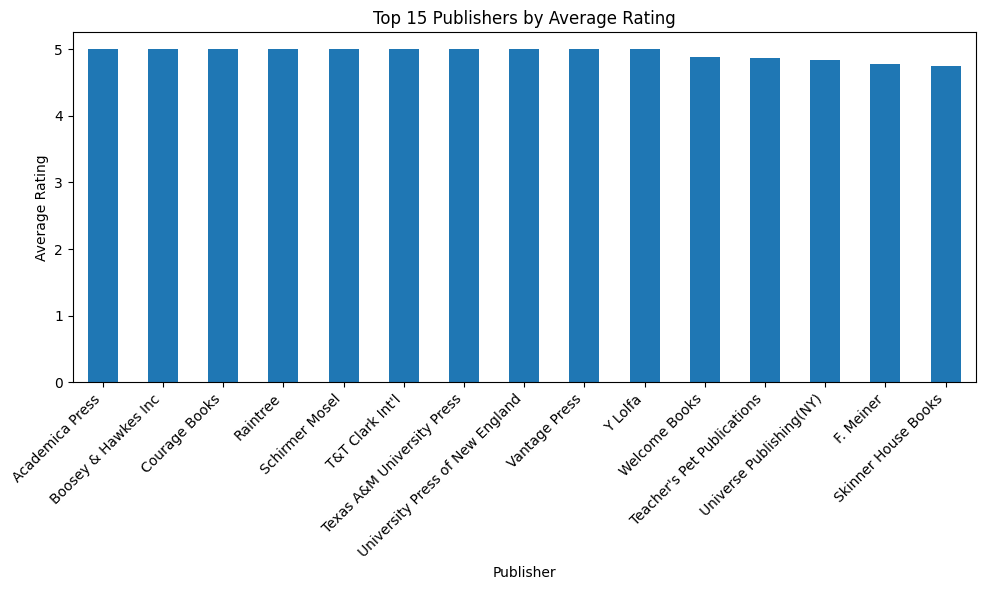

In [217]:
publisher_avg_rating = test_df.groupby('publisher')['average_rating'].mean()

top_20_publisher_avg_rating = publisher_avg_rating.nlargest(15)

plt.figure(figsize=(10, 6))
top_20_publisher_avg_rating.plot(kind='bar')
plt.xlabel('Publisher')
plt.ylabel('Average Rating')
plt.title('Top 15 Publishers by Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

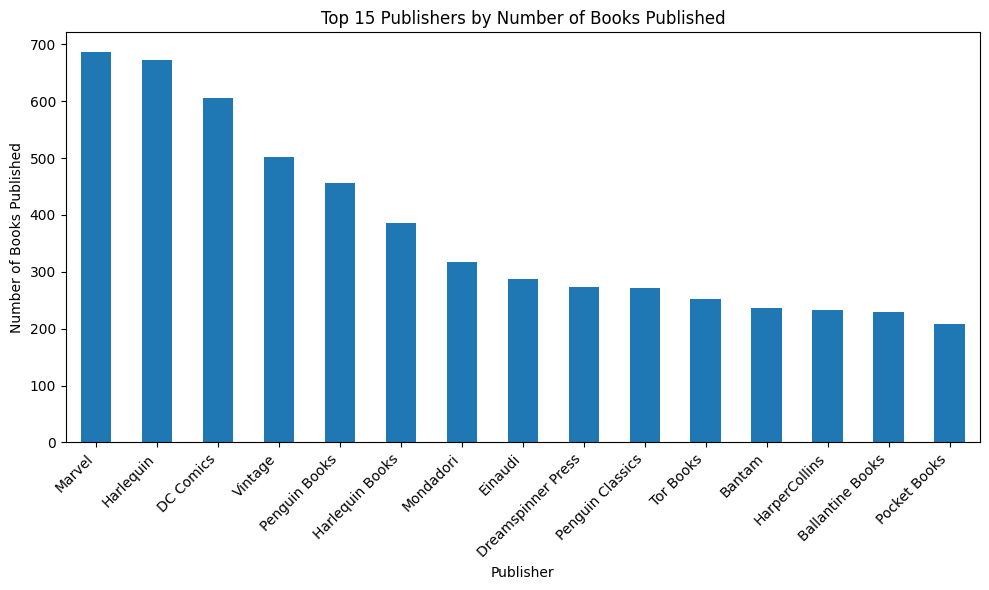

In [218]:
publisher_counts = test_df['publisher'].value_counts()

top_20_publishers = publisher_counts.head(15)

plt.figure(figsize=(10, 6))
top_20_publishers.plot(kind='bar')
plt.xlabel('Publisher')
plt.ylabel('Number of Books Published')
plt.title('Top 15 Publishers by Number of Books Published')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### H. Other Measures

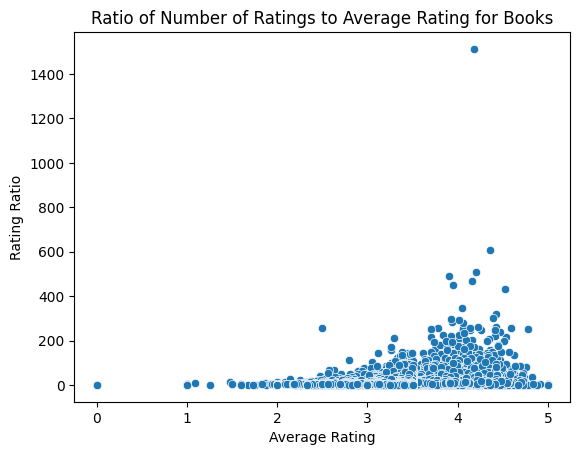

In [221]:
sns.scatterplot(x='average_rating', y='ratings_reviews_ratio', data=test_df)

plt.title('Ratio of Number of Ratings to Average Rating for Books')
plt.xlabel('Average Rating')
plt.ylabel('Rating Ratio')

plt.show()

> The data points are skewed towards the right, meaning the higher the ratio, the higher the rating.

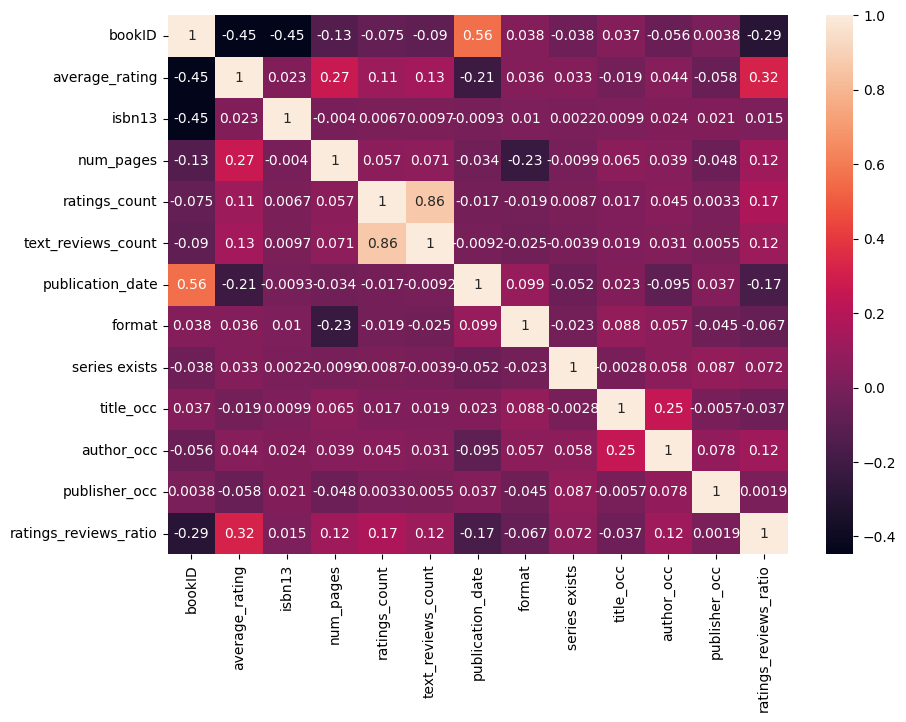

In [222]:
#Correlation matrix with outliers
corr_df = test_df.select_dtypes(exclude=['object'])

correlation_matrix = corr_df.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

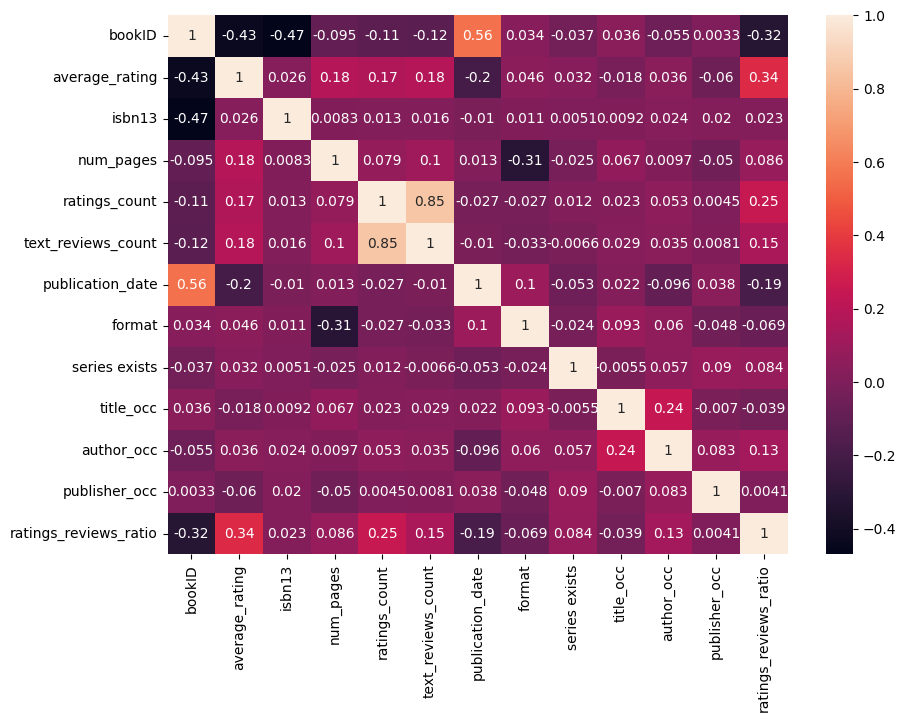

In [223]:
#Correlation matrix without outliers
no_outliers_list = (test_df.ratings_count<1000000) & (test_df.text_reviews_count <20000) & (test_df.num_pages <600)

corr_df = test_df.select_dtypes(exclude=['object'])[no_outliers_list]

correlation_matrix = corr_df.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

> In terms of feature importance, the 4 features remain the same regardless of outlier removal: num_pages, ratings_count, text_reviews_count and ratings_reviews_ratio

### 3. Features Engineering

> We need to:
> * Deal with outliers (ratings count, text reviews count and num_pages)
> * Drop columns (everything except these 4 columns up above)

In [224]:
books_model = final_merged_df.copy()

In [225]:
books_model.columns

Index(['bookID', 'title', 'authors', 'first author', 'average_rating', 'isbn',
       'isbn13', 'language_code', 'num_pages', 'ratings_count',
       'text_reviews_count', 'publication_date', 'publisher', 'format',
       'series exists', 'title_occ', 'author_occ', 'publisher_occ',
       'ratings_reviews_ratio'],
      dtype='object')

In [226]:
#Let's drop the unneeded columns
books_model.drop(columns=['bookID', 'title', 'authors', 'first author', 'isbn', 'isbn13', 'language_code', 'publication_date', 'publisher', 'format', 'series exists', 'title_occ', 'author_occ', 'publisher_occ'], inplace=True)

In [227]:
books_model.columns

Index(['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count',
       'ratings_reviews_ratio'],
      dtype='object')

In [228]:
#Removing outliers
no_outliers_list = (books_model.ratings_count<1000000) & (books_model.text_reviews_count <20000) & (books_model.num_pages <600)

books_model = books_model[no_outliers_list]
books_model.shape

(36906, 5)

In [229]:
books_model.dtypes

average_rating           float64
num_pages                  int64
ratings_count              int64
text_reviews_count         int64
ratings_reviews_ratio    float64
dtype: object

In [230]:
#Let's convert to the same data type
books_model['average_rating'] = books_model['average_rating'].astype('int64')
books_model['ratings_reviews_ratio'] = books_model['ratings_reviews_ratio'].astype('int64')

In [231]:
books_model.dtypes

average_rating           int64
num_pages                int64
ratings_count            int64
text_reviews_count       int64
ratings_reviews_ratio    int64
dtype: object

### 4. Machine Learning Model

#### A. Pre-Processing

In [232]:
from sklearn.model_selection import train_test_split

books_train, books_test = train_test_split(books_model,test_size = 0.2)

In [233]:
len(books_model)

36906

In [234]:
# Total rows of train set
len(books_train)

29524

In [235]:
# Total rows of test set
len(books_test)

7382

In [236]:
#Looking at how the numbers are distributed, the average amount of ratings_count
print(books_model.ratings_count.mean())
print(books_train.ratings_count.mean())
print(books_test.ratings_count.mean())

3591.8593453638973
3574.529772388565
3661.1682470875103


In [237]:
#Look at the average rating across all lines
print(books_model.average_rating.mean())
print(books_train.average_rating.mean())
print(books_test.average_rating.mean())

3.041158619194711
3.040814252811272
3.042535898130588


> The data split are similar. We can proceed to model training.

In [238]:
#Training data
X_train = books_train.loc[:,['num_pages', 'ratings_count', 'text_reviews_count', 'ratings_reviews_ratio']].values
y_train = books_train.average_rating.values

In [239]:
#Testing data
# get the values of the columns for the test data
X_test = books_train.loc[:,['num_pages', 'ratings_count', 'text_reviews_count', 'ratings_reviews_ratio']].values
y_test = books_train.average_rating.values

#### B. Model Training

In [240]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

A great summary sheet of the popular regression models can be found here: [Click for Link](https://towardsdatascience.com/a-beginners-guide-to-regression-analysis-in-machine-learning-8a828b491bbf)

<b>Linear Regression</b>

In [241]:
from sklearn.linear_model import LinearRegression

In [242]:
#Initialize the model
lr_model = LinearRegression()

#Train model on training data
lr_model.fit(X=X_train, y=y_train)

LinearRegression()

In [243]:
#Store the predicted values
pred_lr_test = lr_model.predict(X_test)
pred_lr_train = lr_model.predict(X_train)

In [244]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test, pred_lr_test)
rmse = root_mean_squared_error(y_test, pred_lr_test)
r2 = r2_score(y_test, pred_lr_test)
mae = mean_absolute_error(y_test, pred_lr_test)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R2 Score:", r2)
print("MAE:", mae)

Mean Squared Error: 0.17562630313307814
Root Mean Squared Error (RMSE): 0.4190779201211609
R2 Score: 0.08836917403560085
MAE: 0.2202021320081043


<b>Random Forest</b>

In [245]:
from sklearn.ensemble import RandomForestRegressor

In [246]:
#Initialize the model
rfr_model = RandomForestRegressor()

#Train model on training data
rfr_model.fit(X=X_train, y=y_train)

RandomForestRegressor()

In [247]:
#Store the predicted values
pred_rfr_test = rfr_model.predict(X_test)
pred_rfr_train = rfr_model.predict(X_train)

In [248]:
mse_rfr = mean_squared_error(y_test, pred_rfr_test)
rmse_rfr = root_mean_squared_error(y_test, pred_rfr_test)
r2_rfr = r2_score(y_test, pred_rfr_test)
mae_rfr = mean_absolute_error(y_test, pred_rfr_test)

print("Mean Squared Error:", mse_rfr)
print("Root Mean Squared Error (RMSE):", rmse_rfr)
print("R2 Score:", r2_rfr)
print("MAE:", mae_rfr)

Mean Squared Error: 0.035160126476904155
Root Mean Squared Error (RMSE): 0.18751033698680228
R2 Score: 0.8174928551740615
MAE: 0.11014731960504492


<b>Polynomial Regression</b>

In [249]:
from sklearn.preprocessing import PolynomialFeatures

In [250]:
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)

#Initialize the model
pr_model = LinearRegression()

#Train model on training data
pr_model.fit(X=X_train_poly, y=y_train)

LinearRegression()

In [251]:
X_test_poly = poly_features.fit_transform(X_test)

#Store the predicted values
pred_pr_test = pr_model.predict(X_test_poly)
pred_pr_train = pr_model.predict(X_train_poly)

In [252]:
mse_pr = mean_squared_error(y_test, pred_pr_test)
rmse_pr = root_mean_squared_error(y_test, pred_pr_test)
r2_pr = r2_score(y_test, pred_pr_test)
mae_pr = mean_absolute_error(y_test, pred_pr_test)

print("Mean Squared Error:", mse_pr)
print("Root Mean Squared Error (RMSE):", rmse_pr)
print("R2 Score:", r2_pr)
print("MAE:", mae_pr)

Mean Squared Error: 0.17104306862527374
Root Mean Squared Error (RMSE): 0.41357353472541464
R2 Score: 0.11215956183857301
MAE: 0.22664864376935737


<b>Ada Boost & Decision Tree</b>

In [253]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [254]:
#Initialize the model
ada_model = AdaBoostRegressor()

#Train model on training data
ada_model.fit(X_train, y_train.ravel())

AdaBoostRegressor()

In [255]:
# Predicted values
pred_ada_test = ada_model.predict(X_test)
pred_ada_train = ada_model.predict(X_train)

In [256]:
mse_ada = mean_squared_error(y_test, pred_ada_test)
rmse_ada = root_mean_squared_error(y_test, pred_ada_test)
r2_ada = r2_score(y_test, pred_ada_test)
mae_ada = mean_absolute_error(y_test, pred_ada_test)

print("Mean Squared Error:", mse_ada)
print("Root Mean Squared Error (RMSE):", rmse_ada)
print("R2 Score:", r2_ada)
print("MAE:", mae_ada)

Mean Squared Error: 0.16264170566205033
Root Mean Squared Error (RMSE): 0.40328861335531196
R2 Score: 0.1557688693327165
MAE: 0.27769873655530597


### C. Model Comparison 

In [257]:
metrics_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Polynomial Regression', 'AdaBoost'],
    'MSE': [mse, mse_rfr, mse_pr, mse_ada],
    'RMSE': [rmse, rmse_rfr, rmse_pr, rmse_ada],
    'R2 Score': [r2, r2_rfr, r2_pr, r2_ada],
    'MAE': [mae, mae_rfr, mae_pr, mae_ada]
})

# Set the 'Model' column as the index
metrics_df.set_index('Model', inplace=True)

print(metrics_df)

                            MSE      RMSE  R2 Score       MAE
Model                                                        
Linear Regression      0.175626  0.419078  0.088369  0.220202
Random Forest          0.035160  0.187510  0.817493  0.110147
Polynomial Regression  0.171043  0.413574  0.112160  0.226649
AdaBoost               0.162642  0.403289  0.155769  0.277699


> The best regression model is the one with the lowest MSE and RMSE and MAE score, as well as R2 score closest to 1. From this table, we can say that the Random Forest model is the best model by far, outperforming all the other ones.